e07068 contains a very dramatic variable in both NUV and FUV that is not being picked up by the variability search. This is not ok! Probably other variables are being missed. Why is this one being missed?

In [1]:
%matplotlib inline

In [2]:
from gfcat_utils import *

/Users/cm/GFCAT/gfcat/gfcat_utils.py:234: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if band is 'FUV' and not any(lc['cps']>0.5):


In [3]:
import numpy as np
from astropy.io import fits as pyfits
from astropy import wcs as pywcs
from astropy.visualization import simple_norm, ZScaleInterval
import imageio

In [4]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [9]:
band = 'NUV'
b = band[0].lower()+'d'
eclipse = 7068
e = str(eclipse).zfill(5)
print(f"Processing e{e}...")
tmpdir = "/Users/cm/GFCAT/gfcat/tmp/"
lc_filename = f"/Users/cm/github/gphoton_working/test_data/e{e}/e{e}-{b}-30s-photom-12_8.csv"
fn = f"/Users/cm/github/gphoton_working/test_data/e{e}/e{e}-{b}-full-rice.fits"
fn_mov = f"/Users/cm/github/gphoton_working/test_data/e{e}/e{e}-{b}-30s-rice.fits"
lc = parse_lightcurves(lc_filename)

x = np.array([source['xcenter'] for source in lc])
y = np.array([source['ycenter'] for source in lc])
cps = np.array([np.nanmean(source['cps']) for source in lc])

variables = screen_gfcat([eclipse],band=band,aper_radius=12.8,photdir="/Users/cm/github/gphoton_working/test_data")
print(variables)

image,flagmap,edgemap,wcs,tranges,exptimes=read_image(fn,hdunum=1)
image[np.where(np.isinf(image))]=0 # because it pops out with inf values... IDK

Processing e07068...

  0%|                                                     | 0/1 [00:00<?, ?it/s]

{
    'id': [2832, 4205, 4223, 4251, 4294, 4312, 4316, 4363, 4385, 4420, 4435],
    'cps': [
        0.8870202168352144,
        1.3599067418864452,
        0.9802305309020642,
        1.1039688159105583,
        5.3614273629612805,
        0.99361150235116,
        0.9791228426317127,
        0.9952019940896143,
        2.1698625267475324,
        1.1891089369418677,
        1.0771607104469172
    ],
    'xcenter': [
        840.608061745091,
        2473.688362688234,
        2495.8512092067162,
        2466.2949018340905,
        2481.09125600596,
        2104.7965737136647,
        2459.426517578806,
        2499.544287004822,
        2481.5091625809396,
        2470.2853106962675,
        2488.171049910338
    ],
    'ycenter': [
        641.9503652426013,
        805.0054569136277,
        807.633772938944,
        809.3086142748463,
        814.9341185127178,
        818.3105123082827,
        817.9756853715517,
        821.8827589636483,
        824.5725617329559,
        830.03284389606,
        832.2108655771723
    ],
    'delta_cps': [
        -1.7099439571596164,
        -6.769850932721407,
        -7.4169975634217105,
        -4.0513827003402305,
        -270.1040564656368,
        -1.276409624415516,
        -2.2635671300258897,
        -2.895493526959355,
        -51.437968894236434,
        -2.9592854211016695,
        -3.0502217947867507
    ]
}

[0 1 1 1 1 2 1 1 1 1 1]

{'id': [2832]}

{'id': [2832, 4294, 4312]}

{'id': [2832, 4294, 4312]}

100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.34s/it]


{7068: [2832, 4294, 4312]}

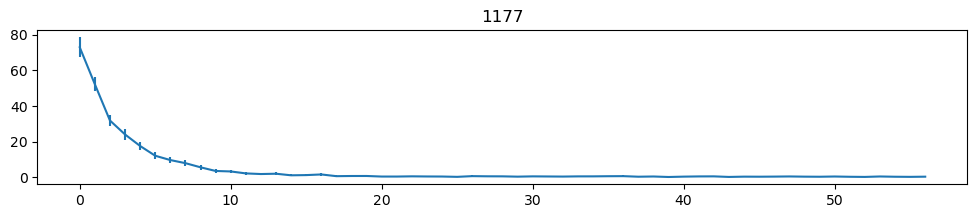

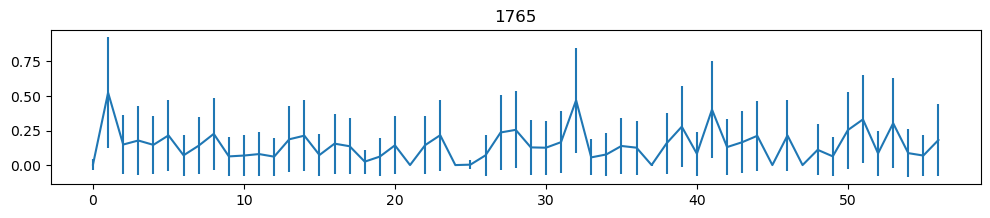

In [6]:
for i in variables[7068]:
    plt.figure(figsize=(12,2));
    t = np.arange(len(lc[i]['cps']))
    plt.title(i)
    plt.errorbar(t,lc[i]['cps'],yerr=3*lc[i]['cps_err']);

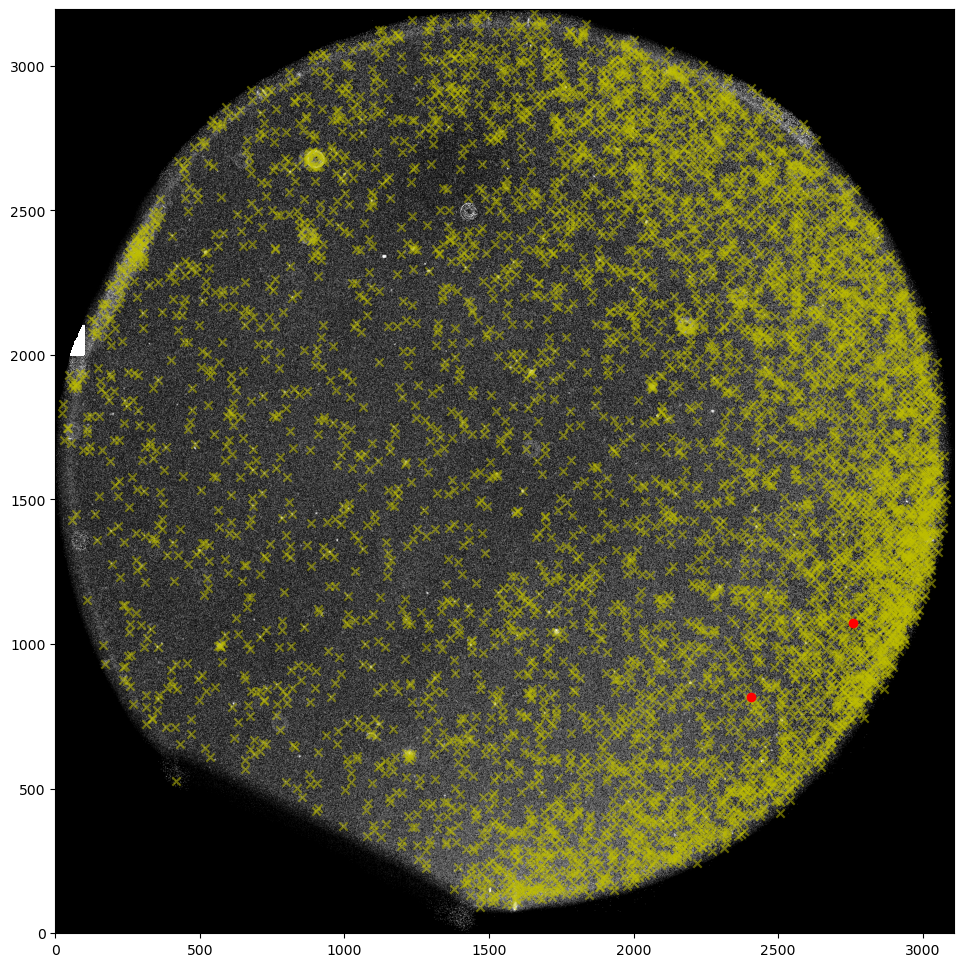

In [7]:
image[np.where(np.isinf(image))]=0 # because it pops out with inf values... IDK
#image[np.where(flagmap)]=0.
x = [source['xcenter'] for source in lc]
y = [source['ycenter'] for source in lc]
plt.figure(figsize=(12,12))
plt.imshow(ZScaleInterval()(image),cmap="Greys_r",origin="lower")
plt.scatter(x,y,c='y',marker='x',alpha=0.5)
#plt.xlim([2300,2500])
#plt.ylim([700,900])
for i in variables[7068]:
    plt.plot(lc[i]['xcenter'], lc[i]['ycenter'],'ro')